In [23]:
# Dataset containing atributes for wine form 3 different vineyards

import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs #make blobs for generating synthetic data
from sklearn.metrics import silhouette_score
import pandas as pd
import seaborn as sns

In [26]:
# Retrieve dataset for clustering
path = 'datasets/'
file = 'wine-clustering.csv'

df = pd.read_csv(path + file)
df = df.dropna()
df.head()
print(df.shape)
print(df.keys())

(178, 13)
Index(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline'],
      dtype='object')


In [27]:
# Create a KMeans instance with the desired number of clusters
# With real data, I would not necesarily know how many clusters are there
n_clusters_pred = 3
kmeans = KMeans(n_clusters=n_clusters_pred)

print('Created kmeans for clustering.')

Created kmeans for clustering.


In [28]:
# Fit the KMeans model to the data
kmeans.fit(df)

print('Fitted kmeans.')

Fitted kmeans.


In [29]:
# Get the cluster labels for each data point,
# these are the labels assigned by kmeans
labels = kmeans.labels_

In [30]:
# Get the coordinates of the cluster centers
cluster_centers = kmeans.cluster_centers_

Inertia: 271004.3476416465
Silhouette Score: 0.571138193786884 . Best:1, worst: -1.


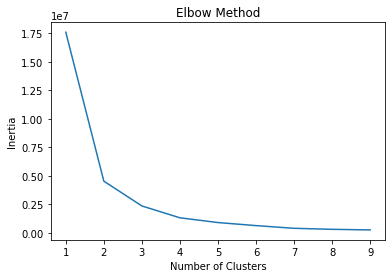

The descent in inertia starts to be less drastic at k = 3, indicating that using 3 clusters is appropriate.


In [36]:
#evaluate the model

#compare inertia between models or numbers of clusters,
#lower inertia means a better fit.
inertia = kmeans.inertia_
print("Inertia:", inertia)

silhouette_avg = silhouette_score(df, labels)
print("Silhouette Score:", silhouette_avg,'. Best:1, worst: -1.')

# Elbow method is used for determining where 
inertias = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df)
    inertias.append(kmeans.inertia_)

plt.plot(range(1, 10), inertias)
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()
print('The descent in inertia starts to be less drastic at k = 3, indicating that using 3 clusters is appropriate.')

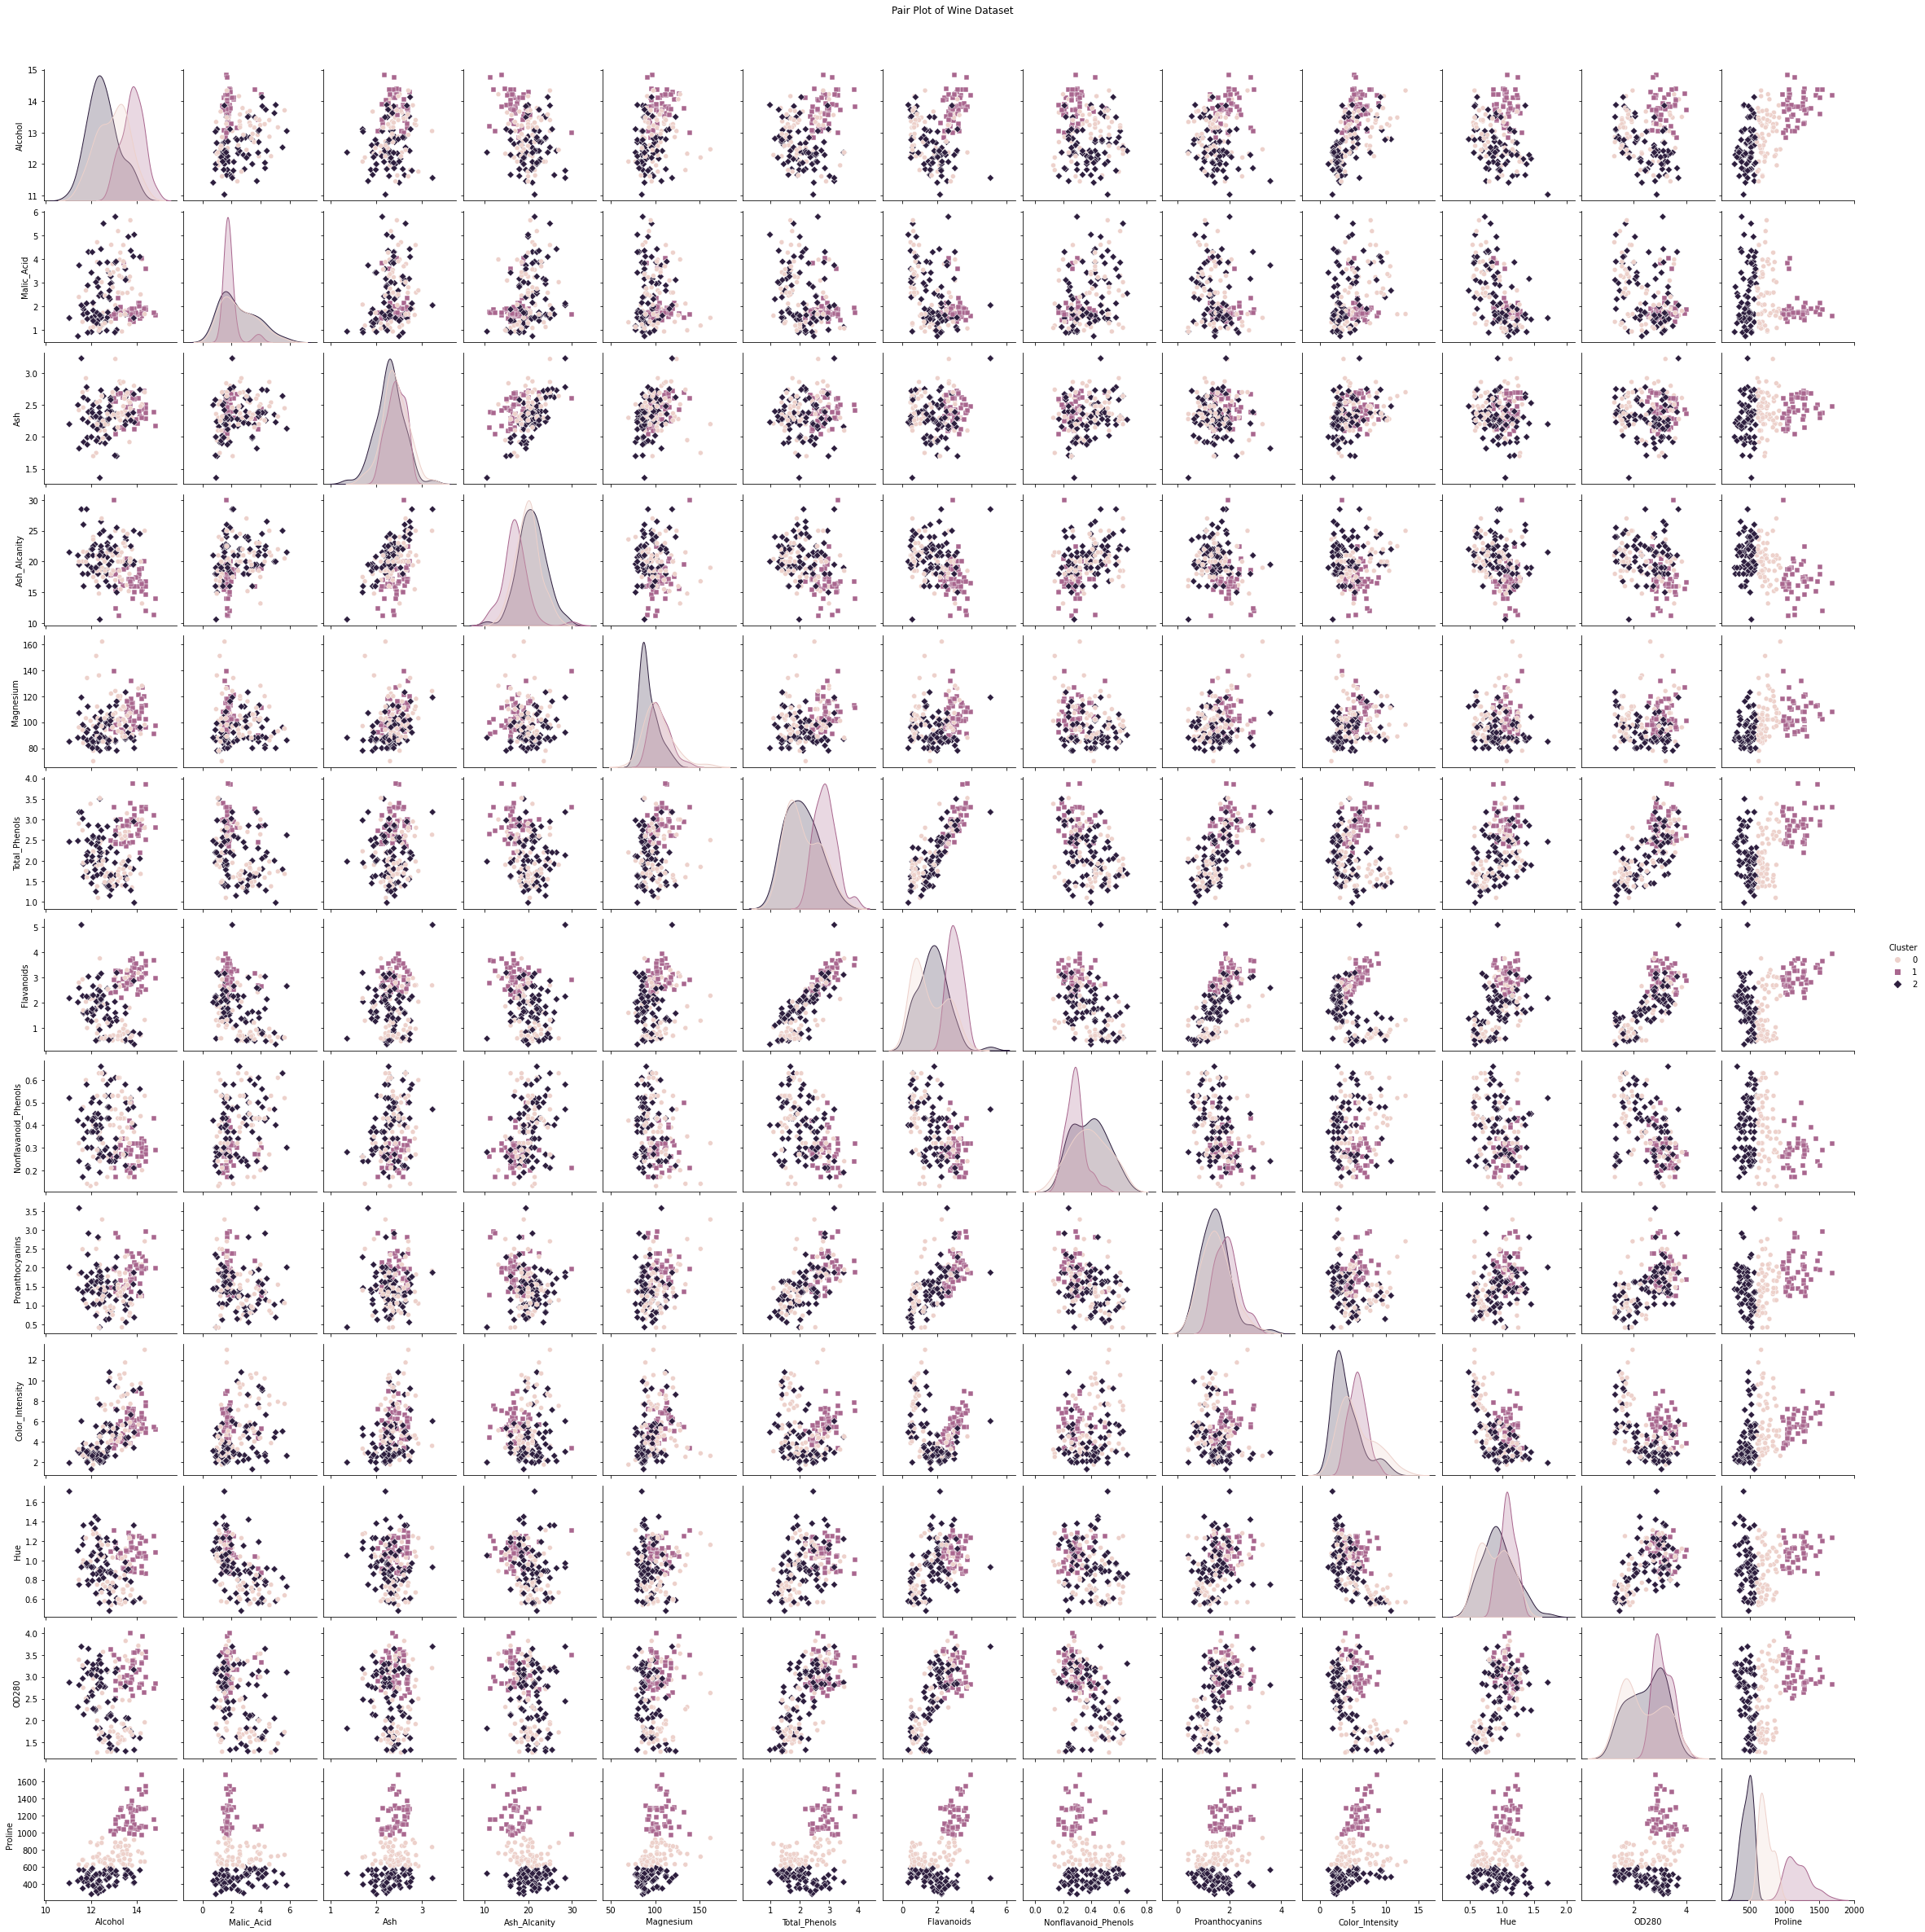

In [43]:
#look for features with a high correlation

# Create a DataFrame with the data and cluster labels
data = pd.DataFrame(df, columns=df.keys())
data['Cluster'] = labels

# Create pair plots
sns.pairplot(data, hue='Cluster', markers=['o', 's', 'D'])

# Add a title
plt.suptitle("Pair Plot of Wine Dataset", y=1.02)

# Display the plots
plt.show()

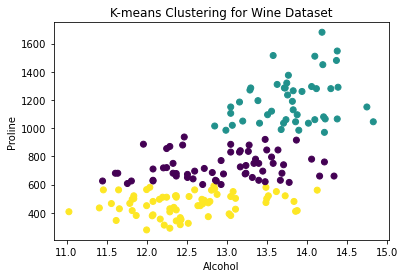

In [47]:
# Visualize the clusters and cluster centers in a pair of variables that provides good separation
plt.scatter(data['Alcohol'], data['Proline'], c=labels, cmap='viridis')
#plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker='x', s=200, color='red')
plt.xlabel('Alcohol')
plt.ylabel('Proline')
plt.title('K-means Clustering for Wine Dataset')
#plt.legend(title='Wineyards', loc='upper left')
plt.show()